1. 정수인코딩

In [1]:
# 텍스트를 숫자로 바꾸는 기법
text = '''모처럼 전국에 비가 내리고 있습니다.
        대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
        비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우
        산 챙기는 게 더 좋습니다.
        특히 제주와 남해안에서 비바람이 강합니다.
        '''

In [2]:
from nltk.tokenize import sent_tokenize
# 문장 토큰화
text = sent_tokenize(text)
print(text)

['모처럼 전국에 비가 내리고 있습니다.', '대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.', '비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우\n        산 챙기는 게 더 좋습니다.', '특히 제주와 남해안에서 비바람이 강합니다.']


In [3]:
# 명사만 추출하는 방법
from konlpy.tag import Okt
okt = Okt()
text2 = []
for txt in text:
    t = okt.nouns(txt)
    text2.append(t)

text2

[['모처럼', '전국', '비'],
 ['대부분', '밤', '계속', '때문', '종일', '우산'],
 ['비', '양도', '바람', '불기', '때문', '우산', '산', '게', '더'],
 ['제주', '남해안', '비바람']]

In [4]:
# 명사와 형용사를 추출하는 방법
from konlpy.tag import Okt
okt = Okt()
text2 = []
for txt in text:
    morph = okt.pos(txt)
    text2.append(morph)

text3 = []
for text in text2:
    line=[]
    for word, tag in text:
        if tag in ['Noun','Adjective']:
            line.append(word)
    text3.append(line)
    
print(text3)

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '산', '게', '더', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [5]:
vocab = {}
sentences = []
stop_words = ['더', '게']
for txt in text3:
    result = []
    for word in txt:
        if word not in stop_words: # 불용어가 아니면
            result.append(word)
            if word not in vocab: # 새로운 단어이면
                vocab[word] = 0 # 출현횟수 0으로
            vocab[word] += 1 # 출현횟수 증가
    sentences.append(result)
print(sentences)

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '산', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [6]:
# 단어:출현빈도
print(vocab)

{'모처럼': 1, '전국': 1, '비': 2, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '때문': 2, '종일': 1, '우산': 2, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '산': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1}


In [7]:
print(vocab["우산"]) # 단어의 빈도수 출력

2


In [8]:
# 단어에 일련번호 부여
word_to_index = {}
i=0
for word in vocab :
    if vocab[word] > 1 : # 빈도수가 1보다 큰 단어들만 추가
        i=i+1
        word_to_index[word] = i # 단어에 번호를 매김
print(word_to_index)

{'비': 1, '때문': 2, '우산': 3}


In [9]:
# Out-Of-Vocabulary 단어 집합에 없는 단어
# 출현빈도수가 낮은 단어들은 word_to_index에 없으므로
# word_to_index에 OOV라는 단어를 추가하고 단어 집합에 없는 단어들은 OOV로 처리
word_to_index['OOV'] = len(word_to_index) + 1
encoded = []
for s in sentences: # 문장들을 반복
    temp = []
    for w in s: # 문장의 단어들을 반복
        try:
            # 단어의 고유번호를 리스트에 추가
            temp.append(word_to_index[w])
        except:
            # 존재하지 않는 단어는 OOV의 인덱스를 추가
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[4, 4, 1, 4], [4, 4, 4, 2, 4, 3, 4], [1, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4], [4, 4, 4, 4]]


In [10]:
import numpy as np
#2차원 데이터를 1차원으로 바꾸고
words = np.hstack(sentences)
print(words)

['모처럼' '전국' '비' '있습니다' '대부분' '밤' '계속' '때문' '종일' '우산' '필요하겠는데요' '비' '양도'
 '많고' '바람' '강하게' '불기' '때문' '작은' '우산' '산' '좋습니다' '제주' '남해안' '비바람' '강합니다']


In [11]:
from collections import Counter
vocab = Counter(words) # 단어의 출현빈도를 쉽게 계산하는 클래스
print(vocab)

Counter({'비': 2, '때문': 2, '우산': 2, '모처럼': 1, '전국': 1, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '종일': 1, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '산': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1})


In [12]:
print(vocab["우산"]) # 단어의 빈도수

2


In [13]:
vocab_size = 5
# 출현빈도가 높은 상위 5개의 단어
vocab = vocab.most_common(vocab_size)
vocab

[('비', 2), ('때문', 2), ('우산', 2), ('모처럼', 1), ('전국', 1)]

In [14]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i+1
    word_to_index[word] = i
print(word_to_index)

{'비': 1, '때문': 2, '우산': 3, '모처럼': 4, '전국': 5}


2. 원핫인코딩

In [15]:
# 정수인코딩의 단점 : 단어의 순서가 없음
# 원핫인코딩 : 단어의 순서에 맞게 배열
from konlpy.tag import Okt
okt=Okt()
# 토근화(형태소 분석)
token=okt.morphs("나는 학교에 간다 나는 집에 간다")
print(token)

['나', '는', '학교', '에', '간다', '나', '는', '집', '에', '간다']


In [16]:
# 중복된 단어는 제외하고 단어를 key로 고유한 숫자 인덱스 부여
word2index={}
for idx,voca in enumerate(token):
    if voca not in word2index.keys():
        word2index[voca]=len(word2index)
print(word2index)

{'나': 0, '는': 1, '학교': 2, '에': 3, '간다': 4, '집': 5}


In [18]:
# 원핫인코딩 함수
def one_hot_encoding(word, word2index):
    # 전체 단어 갯수만큼 0으로 채운 리스트
    one_hot_vector = [0]*(len(word2index))
    # 해당하는 단어의 인덱스를 찾아
    index = word2index[word]
    # 1로 설정(나머지는 0)
    one_hot_vector[index] = 1
    return one_hot_vector

key_list = word2index.keys()
print(key_list)
for key in key_list:
    print(key, one_hot_encoding(key,word2index))

dict_keys(['나', '는', '학교', '에', '간다', '집'])
나 [1, 0, 0, 0, 0, 0]
는 [0, 1, 0, 0, 0, 0]
학교 [0, 0, 1, 0, 0, 0]
에 [0, 0, 0, 1, 0, 0]
간다 [0, 0, 0, 0, 1, 0]
집 [0, 0, 0, 0, 0, 1]


In [19]:
# 케라스에서 지원하는 원핫인코딩 함수
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
text = "나는 학교에 간다 나는 집에 간다"
t = Tokenizer()

# 각 단어에 대한 정수 인코딩
t.fit_on_texts([text])
print(t.word_index)

{'나는': 1, '간다': 2, '학교에': 3, '집에': 4}


In [22]:
# 각 단어에 매핑된 숫자로 변환된 리스트
sub_text = "나는 집에 간다"
encoded = t.texts_to_sequences([sub_text])[0]
print(encoded)

[1, 4, 2]


In [23]:
# 원핫인코딩
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [ ]:
# 원핫인코딩의 단점:
# 단어 갯수가 많아지면 변수의 갯수가 많아지게 됨
# 메모리 활용의 비효율성: 변수가 100개 있다면 99개의 0과 1개의 0으로 구성됨
# 비슷한 단어들의 유사성을 표현하기 어려움
# 강아지 [0,1,1]와 개 [1,0,0] 이라면 비슷한 단어이지만 유사성을 찾기 어려움
# 유사성을 찾기 위한 방법으로 LSA, RNN, Word2Vec 등의 방법이 있음

3. BOW(Bag Of Words)

In [25]:
# Bag Of Words(BOW) : 단어의 등장 순서를 고려하지 않은 빈도수 기반의 텍스트 데이터의 수치화 방법
# 가방에 단어들을 넣으면 순서가 중요하지 않음
# 각 단어에 고유한 인덱스를 부여하고
# 각 인덱스의 위치에 단어의 출현 횟수를 저장

from konlpy.tag import Okt
import re
okt = Okt()
token = re.sub("[.!#~]", "", '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')

# 형태소 분석
token = okt.morphs(token)
word2index = {} # 단어 사전(단어와 숫자 인덱스)
bow = [] # 단어 가방(단어와 출현 횟수)
for voca in token:
    # 사전에 없는 단어 추가
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
        # 단어의 인덱스와 출현횟수(기본값 = 1)
        bow.insert(len(word2index)-1, 1)
    else:
        # 재등장하는 단어의 인덱스
        index = word2index.get(voca)
        # 단어의 카운트 증가
        bow[index] = bow[index] + 1

print(word2index)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [26]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)
print(vector.transform(line).toarray()) # 단어 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['''모처럼 전국에 비가 내리고 있습니다.
            대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
            비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우
            산 챙기는 게 더 좋습니다. ''']
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()
# 코퍼스로부터 각 단어의 빈도수 계산
# 단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())
# 만들어진 단어와 인덱스
print(vector.vocabulary_) # 단어사전

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [29]:
# 공백 단위로 나누어지므로 한국어의 경우 정확도가 떨어짐(비슷한 단어들도 별도로 집계됨)
f = open('../data/text/news1.txt')
corpus = f.read()
txt = okt.nouns(corpus)
txt2 = [' '.join(txt)]
txt2

['정부 코로나 방역 조치 대부분 해제 사실 상의 엔데믹 풍토병 감염병 선언 국내 첫 코로나 확 진자 발생 개월 만이 코로나 중앙 재난 안전 대책 본부 중 대본 윤석열 대통령 주재 회의 격리 의무 해제 내용 방역 완화 조치 발표 코로나 확산 감염병 위기 경보 단계 심각 경계 로 하향 조정 감염병 등급 급 급 내용 것 이 조치 병 의원 약국 감염 취약 시설 등 마스크 착용 의무 가능성 지난 첫 확 진자 발생 뒤 개월 대부분 방역 규제 것 정부 재난 관리 범 정부 차원 중 대본 것 보건복지부 중앙 사고 수습 본부 중수 질병 관리 청 중앙 방역 대책 본부 방 대본 총괄 변결 전망 다만 병원 등 감염 취약 시설 격리 의무 의견 격리 의무 확진 이후 격리 권고 방안 거론 본격 시행 달 말 다음 달 초 가능성 격리 의무 해제 고시 개정 행정 예고 규제 심사 등 절차 소요']

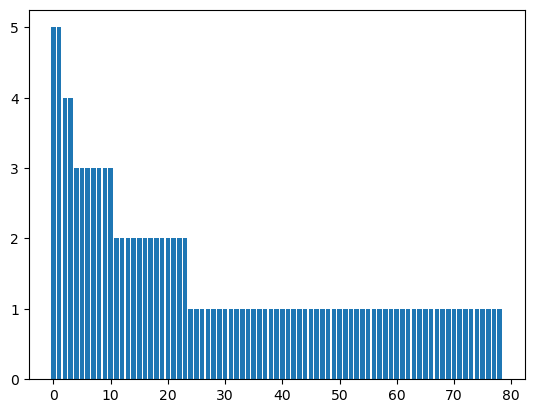

[('의무', 5), ('격리', 5), ('코로나', 4), ('방역', 4), ('정부', 3), ('중앙', 3), ('조치', 3), ('대본', 3), ('본부', 3), ('감염병', 3), ('해제', 3), ('대부분', 2), ('재난', 2), ('발생', 2), ('시설', 2), ('대책', 2), ('가능성', 2), ('진자', 2), ('내용', 2), ('감염', 2), ('규제', 2), ('취약', 2), ('개월', 2), ('관리', 2), ('착용', 1), ('완화', 1), ('위기', 1), ('윤석열', 1), ('의견', 1), ('의원', 1), ('이후', 1), ('확산', 1), ('전망', 1), ('하향', 1), ('절차', 1), ('차원', 1), ('조정', 1), ('풍토병', 1), ('주재', 1), ('중수', 1), ('지난', 1), ('예고', 1), ('질병', 1), ('총괄', 1), ('행정', 1), ('엔데믹', 1), ('수습', 1), ('안전', 1), ('개정', 1), ('거론', 1), ('경계', 1), ('경보', 1), ('고시', 1), ('국내', 1), ('권고', 1), ('다만', 1), ('다음', 1), ('단계', 1), ('대통령', 1), ('등급', 1), ('마스크', 1), ('만이', 1), ('발표', 1), ('방안', 1), ('변결', 1), ('병원', 1), ('보건복지부', 1), ('본격', 1), ('사고', 1), ('사실', 1), ('상의', 1), ('선언', 1), ('소요', 1), ('확진', 1), ('시행', 1), ('심각', 1), ('심사', 1), ('약국', 1), ('회의', 1)]


In [30]:
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(txt2)

# bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) # 카운트 내림차순 정렬
cnt = cnt[idx]

# X축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]
plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [31]:
#불용어 추가
vector = CountVectorizer(stop_words=['더'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[2 2 3 2 1 1 5 1 1 1 2 1 1 2 2 1 1 1 3 2 2 1 1 1 1 2 1 1 4 1 1 1 1 3 1 1
  1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 5 1 1 2 1 1 3 1 3 1 1 3 1 2 1 1 1 1 2 4
  1 1 3 1 1 1 1]]
{'정부': 58, '코로나': 71, '방역': 28, '조치': 60, '대부분': 19, '해제': 74, '사실': 35, '상의': 36, '엔데믹': 46, '풍토병': 72, '감염병': 2, '선언': 37, '국내': 11, '진자': 65, '발생': 25, '개월': 3, '만이': 24, '중앙': 63, '재난': 55, '안전': 44, '대책': 20, '본부': 33, '대본': 18, '윤석열': 50, '대통령': 21, '주재': 61, '회의': 78, '격리': 6, '의무': 52, '내용': 14, '완화': 48, '발표': 26, '확산': 76, '위기': 49, '경보': 8, '단계': 17, '심각': 42, '경계': 7, '하향': 73, '조정': 59, '등급': 22, '의원': 53, '약국': 45, '감염': 1, '취약': 70, '시설': 40, '마스크': 23, '착용': 68, '가능성': 0, '지난': 64, '규제': 13, '관리': 10, '차원': 67, '보건복지부': 31, '사고': 34, '수습': 39, '중수': 62, '질병': 66, '총괄': 69, '변결': 29, '전망': 56, '다만': 15, '병원': 30, '의견': 51, '확진': 77, '이후': 54, '권고': 12, '방안': 27, '거론': 5, '본격': 32, '시행': 41, '다음': 16, '고시': 9, '개정': 4, '행정': 75, '예고': 47, '심사': 43, '절차': 57, '소요': 38}


4. TF-IDF
- TF(Term Frequency)
- IDF(Inverse Document Frequency)

In [48]:
docs = [
    'python 데이터 python 프로그래밍',
    '데이터 분석',
    '빅 데이터 분석',
    '데이터 전처리 텍스트 전처리'
]

vocab = list() # 단어사전 리스트
for doc in docs: # 문서
    for w in doc.split(): # 단어
        vocab.append(w) # 단어 추가

vocab = list(set(vocab)) # 중복 단어를 제거한 리스트
vocab.sort() # 오름차순 정렬
vocab

['python', '데이터', '분석', '빅', '전처리', '텍스트', '프로그래밍']

In [49]:
from math import log
N = len(docs) # 총 문서의 수
# tf(Term Frequency) : 단어의 빈도
# 특정 문서 d에서 특정 단어 t의 출현빈도
def tf(t, d):
    return d.count(t)

# df(Document Frequency) : 특정 단어가 등장한 문서의 수, 모든 문서에 자주 나오는 단어는 중요한 단어가 아닐 수 있음
# 논문에서 abstract, 서론, 본론, 결론, 참고문헌 항상 나오는 단어들 - 중요한 의미가 없음
# idf(Inverse Document Frequency) : df의 반비례하는 수
# log( n / (1+df(t)))
# 희귀 단어의 경우 분모가 매우 작아지게 되어 idf 값이 너무 커지게 되므로 로그를 취함
# 한번도 등장하지 않는 단어라면 분모가 0이 되므로 1을 더하게 됨

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

# tf와 idf를 곱한 값
def tfidf(t, d):
    return tf(t, d) * idf(t)

In [50]:
import pandas as pd
result = []
for i in range(N): # 문서 반복
    result.append([])
    d = docs[i]
    for j in range(len(vocab)): # 단어 반복
        t = vocab[j]
        # 1차원 배열의 끝에 추가
        result[-1].append(tf(t, d))
print(result)

[[2, 1, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0], [0, 1, 0, 0, 2, 1, 0]]


In [51]:
df_tf = pd.DataFrame(result, columns=vocab)
df_tf

,python,데이터,분석,빅,전처리,텍스트,프로그래밍
0,2,1,0,0,0,0,1
1,0,1,1,0,0,0,0
2,0,1,1,1,0,0,0
3,0,1,0,0,2,1,0


In [52]:
# 각 단어의 idf 계산
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
df_idf = pd.DataFrame(result, index = vocab, columns = ["IDF"])
df_idf

,IDF
python,0.693147
데이터,-0.223144
분석,0.287682
빅,0.693147
전처리,0.693147
텍스트,0.693147
프로그래밍,0.693147


In [53]:
# 모든 단어들의 tfidf 계산 = tfidf가 크면 중요도가 높고, 작으면 중요도가 낮다
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t, d))

df_tfidf = pd.DataFrame(result, columns=vocab)
df_tfidf

,python,데이터,분석,빅,전처리,텍스트,프로그래밍
0,1.386294,-0.223144,0.000000,0.000000,0.000000,0.000000,0.693147
1,0.000000,-0.223144,0.287682,0.000000,0.000000,0.000000,0.000000
2,0.000000,-0.223144,0.287682,0.693147,0.000000,0.000000,0.000000
3,0.000000,-0.223144,0.000000,0.000000,1.386294,0.693147,0.000000


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
        'you know I want your love',
        'I like you',
        'what should I do ',
        ]

# DTM(Document Term Matrix, 문서 단어 행렬)
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

# 사이킷런의 TF-IDF 계산 방식이 약간 차이가 나지만 일반적으로 많이 사용되는 함수
# tf-idf에 L2 정규화를 적용하여 값을 조정함

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


5. 코사인 유사도

In [54]:
# 유클리드 거리
import numpy as np
def dist(x, y):
    return np.sqrt(np.sum((x - y)**2))

doc0 = np.array((1,1,0,1))
doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
print(dist(doc0,doc1)) #doc0과 doc1의 거리
print(dist(doc0,doc2))

2.23606797749979
3.1622776601683795


In [55]:
# 자카드 유사도 : 두 문서의 총 단어 집합에서 공통적으로 출현한 단어의 비율
doc1 = "python 파이썬 데이터"
doc2 = "빅데이터 python 파이썬"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()
print(tokenized_doc1)
print(tokenized_doc2)

['python', '파이썬', '데이터']
['빅데이터', 'python', '파이썬']


In [56]:
# 합집합
union = set(tokenized_doc1).union(set(tokenized_doc2))
print(union)

{'빅데이터', '데이터', '파이썬', 'python'}


In [57]:
# 교집합
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
intersection

{'python', '파이썬'}

In [58]:
print(len(intersection)/len(union))

0.5


In [59]:
# 코사인 유사도 (Cosine Similarity)
# 두 벡터 간의 코사인 각도를 이용하여 구하는 두 벡터의 유사도
# 두 벡터의 방향이 완전히 같으면 1, 90도이면 0, 반대 방향이면 -1
# 1에 가까울수록 유사도가 높다고 판단

from numpy import dot

a = [0, 1, 1]
b = [1, 0, 2]

# 배열의 곱(0x1 + 1x0 + 1x2)
dot(a, b)

2

In [60]:
from math import sqrt
from numpy.linalg import norm

a = [0,1,1]
b = [1,0,2]

print(norm(a)) # a의 제곱합의 제곱근
print(sqrt(2))
print(norm(b))
print(sqrt(5))
print(norm(a)*norm(b))

1.4142135623730951
1.4142135623730951
2.23606797749979
2.23606797749979
3.1622776601683795


In [61]:
# a, b의 코사인 유사도
print(dot(a, b) / (norm(a) * norm(b)))

0.6324555320336759


In [62]:
def cos_sim(A, B):
    return dot(A, B)/(norm(A) * norm(B))

In [63]:
import numpy as np

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,3])
doc4 = np.array([0,2,2,2])

print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도
print(cos_sim(doc1, doc4)) #문서1과 문서4의 코사인 유사도

#코사인 유사도는 단순한 빈도수보다도 두 벡터의 방향이 완전히 동일한 경우에는 1(유사도가 최대)

0.6666666666666667
0.7001400420140049
0.9801960588196069
1.0000000000000002


In [64]:
# 줄거리가 유사한 영화 추천
import pandas as pd

# https://www.kaggle.com/rounakbanik/the-movies-dataset
df = pd.read_csv('../data/text/movies_metadata.csv', low_memory=False)
df.head()

# 일부 컬럼에 자료형이 혼합된 경우 메모리 사용량이 증가할 수 있으므로 low_memory=False 사용

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [65]:
df = df.head(10000) # 1만개의 행으로 실습
# overview(줄거리) 필드의 결측값이 있는 행의 수
df['overview'].isnull().sum()

29

In [69]:
# 결측값을 빈값으로 채움
df['overview'] = df['overview'].fillna('')
df['overview'].isnull().sum()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4368\1832647813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview'] = df['overview'].fillna('')


0

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(df['overview'])
print(tfidf_matrix.shape)

(10000, 32350)


In [71]:
from sklearn.metrics.pairwise import linear_kernel
# tfidf에서는 dot product를 구하면 코사인 유사도를 얻을 수 있음
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
linear_kernel([[1, 2]], [[1, 2]]) # 1x1 + 2x2

array([[5.]])

In [73]:
# 영화 제목과 인덱스, drop_duplicates() 중복값 제거
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [74]:
# 영화제목을 입력하면 인덱스가 리턴됨
idx = indices['Toy Story']
idx

0

In [75]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 영화의 제목으로 인덱스 조회
    idx = indices[title]
    # 해당 영화와의 유사도 계산
    sim_scores = list(enumerate(cosine_sim[idx]))
    # 유사도에 따라 정렬, key 정렬기준 필드(두번째값 기준 정렬), reverse 내림차순
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # 가장 유사한 10개의 영화 리스트
    sim_scores = sim_scores[1:11]
    # 리스트의 0번 인덱스
    movie_indices = [i[0] for i in sim_scores]
    # 가장 유사한 10개의 영화의 제목
    return df['title'].iloc[movie_indices]
#가장 유사한 영화 목록
get_recommendations('Toy Story')

2997                                    Toy Story 2
8327                                      The Champ
1071                          Rebel Without a Cause
3057                                Man on the Moon
1932                                      Condorman
485                                          Malice
5797                                  Class of 1984
7254                                 Africa Screams
6944                               Rivers and Tides
7615    The First $20 Million Is Always the Hardest
Name: title, dtype: object

6. 추천시스템(컨텐츠 기반 필터링 : Content based filtering)
- 사용자가 특정 아이템을 선호하는 경우 그 아이템과 비슷한 컨텐츠를 가진 다른 아이템을 추천하는 방식

In [77]:
import pandas as pd
df = pd.read_csv("../data/text/tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [78]:
# genres : 영화 장르
# keywords : 영화의 키워드
# original_language : 영화 언어
# title : 제목
# vote_average : 평점 평균
# vote_count : 평점 카운트
# popularity : 인기도
# overview : 줄거리

# 필요한 필드만 선택
df = df[['id','genres', 'vote_average',
            'vote_count','popularity','title',
            'keywords', 'overview']]
df

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."
...,...,...,...,...,...,...,...,...
4798,9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",6.6,238,14.269792,El Mariachi,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi just wants to play his guitar and ...
4799,72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",5.9,5,0.642552,Newlyweds,[],A newlywed couple's honeymoon is upended by th...
4800,231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",7.0,6,1.444476,"Signed, Sealed, Delivered","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,[],5.7,7,0.857008,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...


In [79]:
df[['genres', 'keywords']].head()

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


In [80]:
dict1 = "{'a':3, 'b':5}"
print(type(dict1)) # 스트링
# print(dict1['a']) # 스트링이므로 에러가 발생
# print(dict1['b'])

<class 'str'>


In [81]:
dict2 = eval(dict1) # 자료형을 스트링에서 딕셔너리로 변환
print(type(dict2))
print(dict2['a'])
print(dict2['b'])

<class 'dict'>
3
5


In [82]:
# 스트링을 딕셔너리 타입으로 변경
# eval('문자열') - 문자열 내에 포함된 파이썬 명령어를 실행하는 함수
df['genres'] = df['genres'].apply(eval)
df['keywords'] = df['keywords'].apply(eval)

# 딕셔너리 내부의 하위 변수들을 합쳐서 문자열 변수 1개에 저장
df['genres'] = df['genres'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : "".join(x))
df['keywords'] = df['keywords'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : "".join(x))

In [83]:
from sklearn.feature_extraction.text  import CountVectorizer
count_vector = CountVectorizer()

# 장르에 대한 출현빈도 계산
c_vector_genres = count_vector.fit_transform(df['genres']).toarray()
c_vector_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [87]:
from sklearn.metrics.pairwise import cosine_similarity
# 코사인 유사도 계산
genre_c_sim = cosine_similarity(c_vector_genres, c_vector_genres).argsort()[:, ::-1]

# 영화 추천 함수
def get_recommend_movie_list(data, movie_title, top=6):
    # 특정 영화 검색
    target_movie_index = data[data['title'] == movie_title].index.values

    # 코사인 유사도 상위 5행
    sim_index = genre_c_sim[target_movie_index, :top].reshape(-1)
    
    # 아이디가 같은 self row 제외
    sim_index = sim_index[sim_index != target_movie_index]

    # data frame으로 만들고 vote_count으로 정렬한 뒤 return
    result = data.iloc[sim_index].sort_values('vote_average', ascending=False)[:10]
    return result

In [88]:
df[df['title'] == 'Superman']

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
813,1924,ActionAdventureFantasyScience Fiction,6.9,1022,48.507081,Superman,saving the worldjournalistdc comicscrime fight...,Mild-mannered Clark Kent works as a reporter a...


In [89]:
get_recommend_movie_list(df, movie_title='Superman')

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
46,127585,ActionAdventureFantasyScience Fiction,7.5,6032,118.078691,X-Men: Days of Future Past,1970smutanttime travelmarvel comicbased on com...,The ultimate X-Men ensemble fights a war for t...
0,19995,ActionAdventureFantasyScience Fiction,7.2,11800,150.437577,Avatar,culture clashfuturespace warspace colonysociet...,"In the 22nd century, a paraplegic Marine is di..."
870,8536,ActionAdventureFantasyScience Fiction,6.5,629,30.515175,Superman II,saving the worlddc comicssequelsuperherobased ...,Three escaped criminals from the planet Krypto...
14,49521,ActionAdventureFantasyScience Fiction,6.5,6359,99.398009,Man of Steel,saving the worlddc comicssuperherobased on com...,A young boy learns that he has extraordinary p...
3494,27549,ActionAdventureFantasyScience Fiction,4.6,17,1.478505,Beastmaster 2: Through the Portal of Time,based on noveltime travelsequelpsychotronicswo...,"Mark Singer returns as Dar, the warrior who ca..."


7. 추천시스템(아이템 기반 협업 필터링)
- 협업 필터링 방식 - 사용자 기반, 아이템 기반(주로 아이템 기반 필터링을 사용함)

In [90]:
# 사용자 기반 협업 필터링:
# 사용자의 행동 양식을 기반으로 추천(평점, 상품 구매 이력 등)
# x축에 아이쳄, y축에 사용자를 표시
# 어떤 사용자와 비슷한 성향의 고객들이 구매한 상품을 추천

# 아이템 기반 협업 필터링:
# x축에 사용자, y축에 아이템을 표시하고 유사한 아이템을 추천해 주는 방식
# 주로 코사인 유사도를 사용하여 계산함
# 어떤 상품과 비슷한 상품을 추천

import pandas as pd
df = pd.read_csv('../data/text/ratings_small.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [91]:
df = df.pivot_table('rating', index = 'userId', columns = 'movieId')
df

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# x축 movieId, y축 userId
# 사용자 아이디별로 영화에 대한 평점을 볼 수 있음
# 영화 제목을 가져오기 위해 데이터프레임 조인
df_ratings= pd.read_csv('../data/text/ratings_small.csv')
df_movies = pd.read_csv('../data/text/tmdb_5000_movies.csv')
df_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [94]:
# 필드명 id를 movieId로 변경
df_movies.rename(columns = {'id': 'movieId'}, inplace = True)

In [95]:
# ratings의 movieId와 movies의 movieId가 같은 행끼리 조인
df_ratings_movies = pd.merge(df_ratings, df_movies, on = 'movieId')
# 영화코드와 영화제목을 결합

In [96]:
# x축 사용자아이디, y축 영화제목의 피벗테이블을 만들고
# NaN은 0으로 채움
df2 = df_ratings_movies.pivot_table('rating', index = 'userId', columns = 'title').fillna(0)
df2

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,28 Days Later,28 Weeks Later,300,"4 Months, 3 Weeks and 2 Days",40 Days and 40 Nights,42nd Street,5 Days of War,50 First Dates,54,8 Mile,8 Women,88 Minutes,A Beautiful Mind,A Bridge Too Far,A Christmas Story,A Dangerous Method,A Few Good Men,A Fistful of Dollars,A Hard Day's Night,A History of Violence,A Mighty Heart,A Nightmare on Elm Street,A Scanner Darkly,A Streetcar Named Desire,A Time to Kill,A Very Long Engagement,A View to a Kill,"A Woman, a Gun and a Noodle Shop",About Schmidt,About a Boy,...,True Romance,Twilight,Twister,Two Brothers,Two Girls and a Guy,Two Weeks Notice,U-571,Under Siege 2: Dark Territory,Underworld,Underworld: Evolution,Valkyrie,Vanilla Sky,Veer-Zaara,Vicky Cristina Barcelona,Videodrome,Volver,Wag the Dog,Walk the Line,War of the Worlds,Wasabi,Wayne's World,We Own the Night,We're No Angels,Whale Rider,What Lies Beneath,What Women Want,What's Eating Gilbert Grape,When Harry Met Sally...,Wild Things,Wild Wild West,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0

In [97]:
# 아이템 기반 협업 필터링에서는 row가 아이템이어야 하므로 x,y축을 바꿈
df2 = df2.transpose()
df2

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"You, Me and Dupree",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Young Frankenstein,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
from sklearn.metrics.pairwise import cosine_similarity
# 코사인 유사도 계산
movie_sim = cosine_similarity(df2, df2)
print(movie_sim.shape)

(856, 856)


In [99]:
# 코사인유사도 벡터를 데이터프레임으로 변환
df_movie_sim = pd.DataFrame(data = movie_sim, index = df2.index, columns = df2.index)
df_movie_sim

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,28 Days Later,28 Weeks Later,300,"4 Months, 3 Weeks and 2 Days",40 Days and 40 Nights,42nd Street,5 Days of War,50 First Dates,54,8 Mile,8 Women,88 Minutes,A Beautiful Mind,A Bridge Too Far,A Christmas Story,A Dangerous Method,A Few Good Men,A Fistful of Dollars,A Hard Day's Night,A History of Violence,A Mighty Heart,A Nightmare on Elm Street,A Scanner Darkly,A Streetcar Named Desire,A Time to Kill,A Very Long Engagement,A View to a Kill,"A Woman, a Gun and a Noodle Shop",About Schmidt,About a Boy,...,True Romance,Twilight,Twister,Two Brothers,Two Girls and a Guy,Two Weeks Notice,U-571,Under Siege 2: Dark Territory,Underworld,Underworld: Evolution,Valkyrie,Vanilla Sky,Veer-Zaara,Vicky Cristina Barcelona,Videodrome,Volver,Wag the Dog,Walk the Line,War of the Worlds,Wasabi,Wayne's World,We Own the Night,We're No Angels,Whale Rider,What Lies Beneath,What Women Want,What's Eating Gilbert Grape,When Harry Met Sally...,Wild Things,Wild Wild West,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,1.000000,0.0,0.000000,0.182153,0.0,0.022069,0.085323,0.0,0.00000,0.103490,0.310272,0.083315,0.067017,0.082759,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.135609,0.191313,0.000000,0.064064,0.000000,0.135769,0.000000,0.000000,0.000000,0.0,0.000000,0.176143,0.209557,0.00000,0.197156,0.238711,0.072700,0.000000,0.000000,0.0,...,0.013443,0.000000,0.000000,0.125931,0.0,0.061959,0.358571,0.000000,0.000000,0.0,0.155284,0.0,0.0,0.000000,0.000000,0.000000,0.170907,0.055927,0.059059,0.000000,0.0,0.154715,0.015541,0.220239,0.000000,0.087588,0.049447,0.000000,0.0,0.000000,0.059856,0.0,0.161801,0.088076,0.0,0.0,0.097588,0.000000,0.000000,0.014121
12 Angry Men,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.118993,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1408,0.000000,0.0,1.000000,0.447214,0.0,0.173381,0.028245,0.0,0.00000,0.000000,0.231423,0.179605,0.205673,0.270914,0.545545,0.000000,0.000000,0.0,0.000000,0.000000,0.173708,0.092401,0.000000,0.000000,0.000000,0.000000,0.316228,0.577350,0.000000,0.0,0.707107,0.040543,0.000000,0.00000,0.145215,0.164833,0.297482,0.000000,0.928477,0.0,...,0.198030,0.000000,0.800000,0.129049,0.0,0.165948,0.000000,0.000000,0.144799,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.468165,0.026926,0.000000,0.217500,0.298765,0.0,0.079968,0.000000,0.078176,1.000000,0.000000,0.233087,0.554700,0.0,0.000000,0.146955,0.0,0.148968,0.140265,0.0,0.0,0.191675,0.000000,0.000000,0.000000
15 Minutes,0.182153,0.0,0.447214,1.000000,0.0,0.077538,0.050526,0.0,0.00000,0.129863,0.206991,0.160644,0.257543,0.212024,0.243975,0.162866,0.000000,0.0,0.116445,0.000000,0.310738,0.165291,0.000000,0.070341,0.000000,0.000000,0.141421,0.258199,0.000000,0.0,0.316228,0.135985,0.000000,0.00000,0.146119,0.172003,0.212861,0.000000,0.415227,0.0,...,0.088561,0.000000,0.357771,0.201994,0.0,0.111321,0.115230,0.138079,0.064756,0.0,0.238698,0.0,0.0,0.000000,0.000000,0.209370,0.060209,0.000000,0.097269,0.233821,0.0,0.214577,0.000000,0.244731,0.447214,0.000000,0.104240,0.248069,0.0,0.000000,0.197160,0.0,0.216516,0.141138,0.0,0.0,0.085720,0.115684,0.1213

In [100]:
# 킹콩 영화와 코사인 유사도가 비슷한 5개의 영화 추천
df_movie_sim["King Kong"].sort_values(ascending=False)[1:5]

title
Fantasia     0.648886
2046         0.648886
Liar Liar    0.486664
Rendition    0.486664
Name: King Kong, dtype: float64